In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [9]:
from datasets.carla import *
from tools.utils import *
from tools.loss import *

%matplotlib inline
import matplotlib.pyplot as plt

from numpy.linalg import inv

In [12]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [10]:
data = CarlaDataset("../../data/carla/ood", False)

TypeError: __init__() missing 1 required positional argument: 'n_classes'

In [6]:
model = Evidential(backbone="lss", devices=[7])
# model.load(torch.load("../outputs/aug/19.pt"))

Loaded pretrained weights for efficientnet-b0


In [7]:
images, intrinsics, extrinsics, labels, ood = data[256]

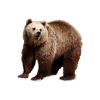

In [8]:
bear = Image.open("./pseudo/bear/b.png").resize((100, 100))
bear

In [9]:
images[1].numpy().shape

(3, 224, 480)

In [ ]:
i = (images[1] * 255).permute(1, 2, 0).numpy().astype(np.uint8)
front = Image.fromarray(i) 

In [ ]:
front.paste(bear, (250, 100), bear)

In [ ]:
front

In [ ]:
images[1] = torch.tensor(np.array(front)).permute(2, 0, 1) / 255.

In [ ]:
images = images[None].to(7)
intrinsics = intrinsics[None].to(7)
extrinsics = extrinsics[None].to(7)
labels = labels[None].to(7)

In [ ]:
alpha = model(images, intrinsics, extrinsics)
preds = model.activate(alpha)
epist = model.epistemic(alpha)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(8, 8))
fig.subplots_adjust(wspace=0, hspace=0)

axs[0].imshow(map_rgb(preds[0], ego=True) / 255)
axs[1].imshow(epist[0, 0].detach().cpu().numpy(), cmap="magma")
axs[2].imshow(ood, cmap="magma")

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
ratio = 224/480
fig, axs = plt.subplots(2, 3, figsize=(12, 8 * ratio))
fig.subplots_adjust(wspace=0, hspace=0)

for i, ax in enumerate(axs.flatten()):
    image = images[0, i].permute(1, 2, 0).cpu().numpy()
    ax.imshow(image)
    ax.axis("off")

In [5]:
a = torch.tensor(0) ** 3

In [6]:
a

tensor(0)